In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("C:\\Users\\lmaheshwari\\Downloads\\Bank_Personal_Loan_Modelling-1.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [25]:
df.dtypes
df = df.drop(['Experience'],axis=1)

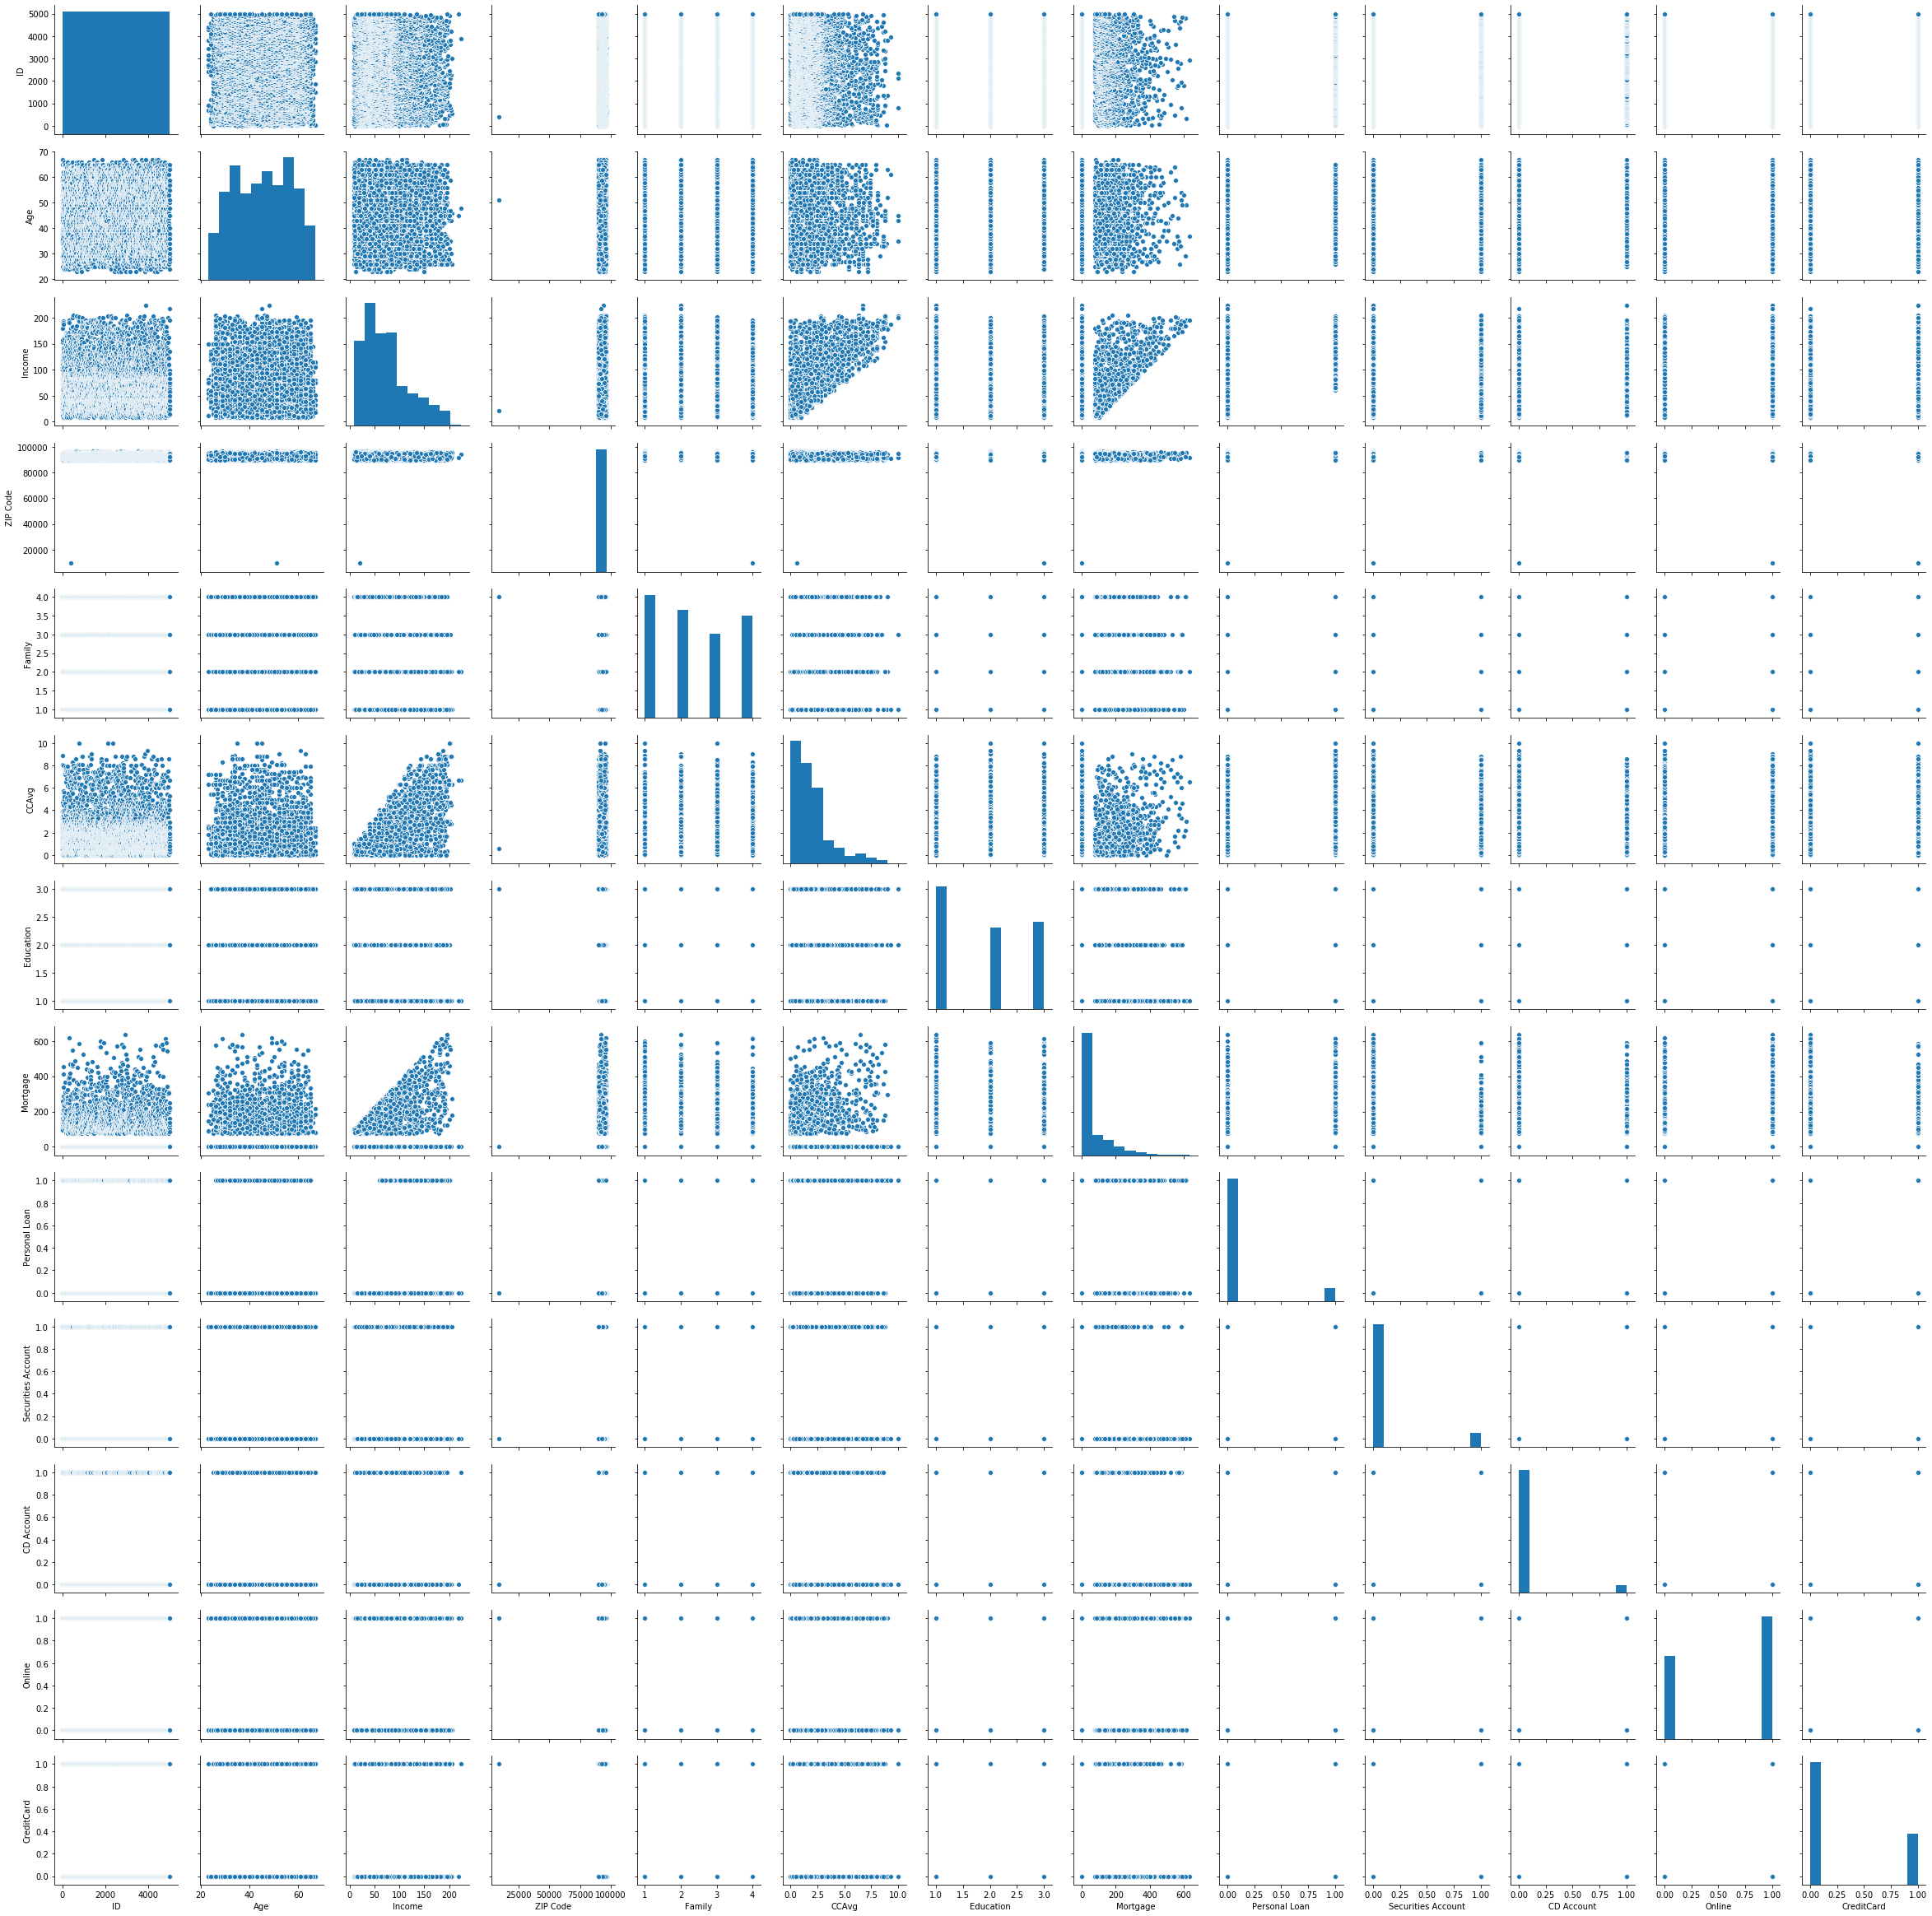

In [27]:
import seaborn as sns
sns.pairplot(df)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn import model_selection
array = df.values
X=array[:,0:8]
y=array[:,8]
test_size = 0.30 # taking 80:20 training and test set
seed = 5
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size)

In [29]:
#Logistic ReGression
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

C:\Users\lmaheshwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
from sklearn import metrics
print('Accuray is:', model_score)
print('F1 Score is:', metrics.f1_score(y_test, y_predict, average=None))
print("Confusion Matrix: ", confusion_matrix(y_test, y_predict)) 

Accuray is: 0.9153333333333333
F1 Score is: [0.95413507 0.45021645]
Confusion Matrix:  [[1321   45]
 [  82   52]]


In [33]:
# Naive Based
from sklearn.naive_bayes import GaussianNB

In [34]:
model = GaussianNB()
model.fit(X_train, y_train)
#Predict Output
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

Predicted Value: [0. 0. 0. ... 0. 1. 0.]


In [38]:
print("Confusion Matrix: ", confusion_matrix(y_test, predicted)) 
print ("Accuracy : ", accuracy_score(y_test,predicted)*100)
print('F1 Score is:', metrics.f1_score(y_test, y_predict, average=None))

Confusion Matrix:  [[1274   92]
 [  45   89]]
Accuracy :  90.86666666666666
F1 Score is: [0.95413507 0.45021645]


In [39]:
# KNeighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_pred = classifier.predict(X_test)

In [46]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
print('F1 Score is:', metrics.f1_score(y_test, y_pred, average=None))

Confusion Matrix:  [[1364    7]
 [ 129    0]]
F1 Score is: [0.95251397 0.        ]


In [47]:
print('classification_report', classification_report(y_test, y_pred))

classification_report               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1371
         1.0       0.00      0.00      0.00       129

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500

